Datu ielasīšana, priekšapstrāde un sākotnējā atspoguļošana
---



In [36]:
#Visu datu ielasīšanai, priekšapstrādei un vizualizācijai nepieciešamo bibliotēku pievienošana
import csv          
import requests     
import numpy as np  
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [37]:
#Pieslēgšanas Google kontam
# from google.colab import drive
# drive.mount('/content/gdrive')
#Tiek iegūts diska saturs
#  import os
# os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
# !ls
#Tiek nolasīts datu kopas fails
datu_kopa = pd.read_csv('/workspaces/MIP_projekts2/dataset/heart.csv')
#Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes) 

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


### Datu tipu salāgošana 

In [38]:
#Tā kā kategoriskiem atribūtiem tiek norādīts tips "object", tas tiek mainīts uz "category"
datu_kopa["Sex"] = datu_kopa["Sex"].astype('category')
datu_kopa["ChestPainType"] = datu_kopa["ChestPainType"].astype('category')
datu_kopa["RestingECG"] = datu_kopa["RestingECG"].astype('category')
datu_kopa["ExerciseAngina"] = datu_kopa["ExerciseAngina"].astype('category')
datu_kopa["ST_Slope"] = datu_kopa["ST_Slope"].astype('category')
#Tiek izvadīti pirmie 7 ieraksti datu kopā
print(datu_kopa.head(7))

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up           

In [39]:
#Tiek izveidotas jaunas kolonas kategoriskajiem atribūtiem un to vērtības tiek pārvērstas par skaitliskām vērtībām
datu_kopa["Sex_cat"] = datu_kopa["Sex"].cat.codes
datu_kopa["ChestPainType_cat"] = datu_kopa["ChestPainType"].cat.codes
datu_kopa["RestingECG_cat"] = datu_kopa["RestingECG"].cat.codes
datu_kopa["ExerciseAngina_cat"] = datu_kopa["ExerciseAngina"].cat.codes
datu_kopa["ST_Slope_cat"] = datu_kopa["ST_Slope"].cat.codes
#Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes)
#Tiek izvadīti pirmie 7 ieraksti datu kopā
print(datu_kopa.head(7))
# a = datu_kopa
# print(a)

Age                      int64
Sex                   category
ChestPainType         category
RestingBP                int64
Cholesterol              int64
FastingBS                int64
RestingECG            category
MaxHR                    int64
ExerciseAngina        category
Oldpeak                float64
ST_Slope              category
HeartDisease             int64
Sex_cat                   int8
ChestPainType_cat         int8
RestingECG_cat            int8
ExerciseAngina_cat        int8
ST_Slope_cat              int8
dtype: object
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195      

###Informācijas par datu kopu izvade un analīze

In [59]:
#Tālākajam darbam tiek atmesti kategorijas tipa atribūti
samazinata_datu_kopa = datu_kopa[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease","Sex_cat","ChestPainType_cat","RestingECG_cat","ExerciseAngina_cat","ST_Slope_cat"]]
#Tiek izvadīti dati par datu kopu
# print(samazinata_datu_kopa.describe())
# print(samazinata_datu_kopa.info())
print(samazinata_datu_kopa)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_cat  ChestPainType_cat  RestingECG_cat  ExerciseAngina_cat  \
0   

### Datu normalizācija

In [41]:
#Četriem atribūtiem tiek veikta datu normalizācija, lai dati būtu uzskatāmaki "Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"
darba_datu_kopa=samazinata_datu_kopa.copy()
darba_datu_kopa['Age']=(darba_datu_kopa['Age']-darba_datu_kopa['Age'].min())/(darba_datu_kopa['Age'].max()-darba_datu_kopa['Age'].min())
darba_datu_kopa['RestingBP']=(darba_datu_kopa['RestingBP']-darba_datu_kopa['RestingBP'].min())/(darba_datu_kopa['RestingBP'].max()-darba_datu_kopa['RestingBP'].min())
darba_datu_kopa['Cholesterol']=(darba_datu_kopa['Cholesterol']-darba_datu_kopa['Cholesterol'].min())/(darba_datu_kopa['Cholesterol'].max()-darba_datu_kopa['Cholesterol'].min())
darba_datu_kopa['FastingBS']=(darba_datu_kopa['FastingBS']-darba_datu_kopa['FastingBS'].min())/(darba_datu_kopa['FastingBS'].max()-darba_datu_kopa['FastingBS'].min())
darba_datu_kopa['MaxHR']=(darba_datu_kopa['MaxHR']-darba_datu_kopa['MaxHR'].min())/(darba_datu_kopa['MaxHR'].max()-darba_datu_kopa['MaxHR'].min())
darba_datu_kopa['Oldpeak']=(darba_datu_kopa['Oldpeak']-darba_datu_kopa['Oldpeak'].min())/(darba_datu_kopa['Oldpeak'].max()-darba_datu_kopa['Oldpeak'].min())
darba_datu_kopa['HeartDisease']=(darba_datu_kopa['HeartDisease']-darba_datu_kopa['HeartDisease'].min())/(darba_datu_kopa['HeartDisease'].max()-darba_datu_kopa['HeartDisease'].min())
print(datu_kopa.head(10))
print(datu_kopa.describe())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Sex_cat  ChestPainType_cat  \
0              N      0.0   

Datu un faktoru vērtību vizualizācija
---

### Vērtību attēlojums

<Axes: xlabel='RestingBP', ylabel='MaxHR'>

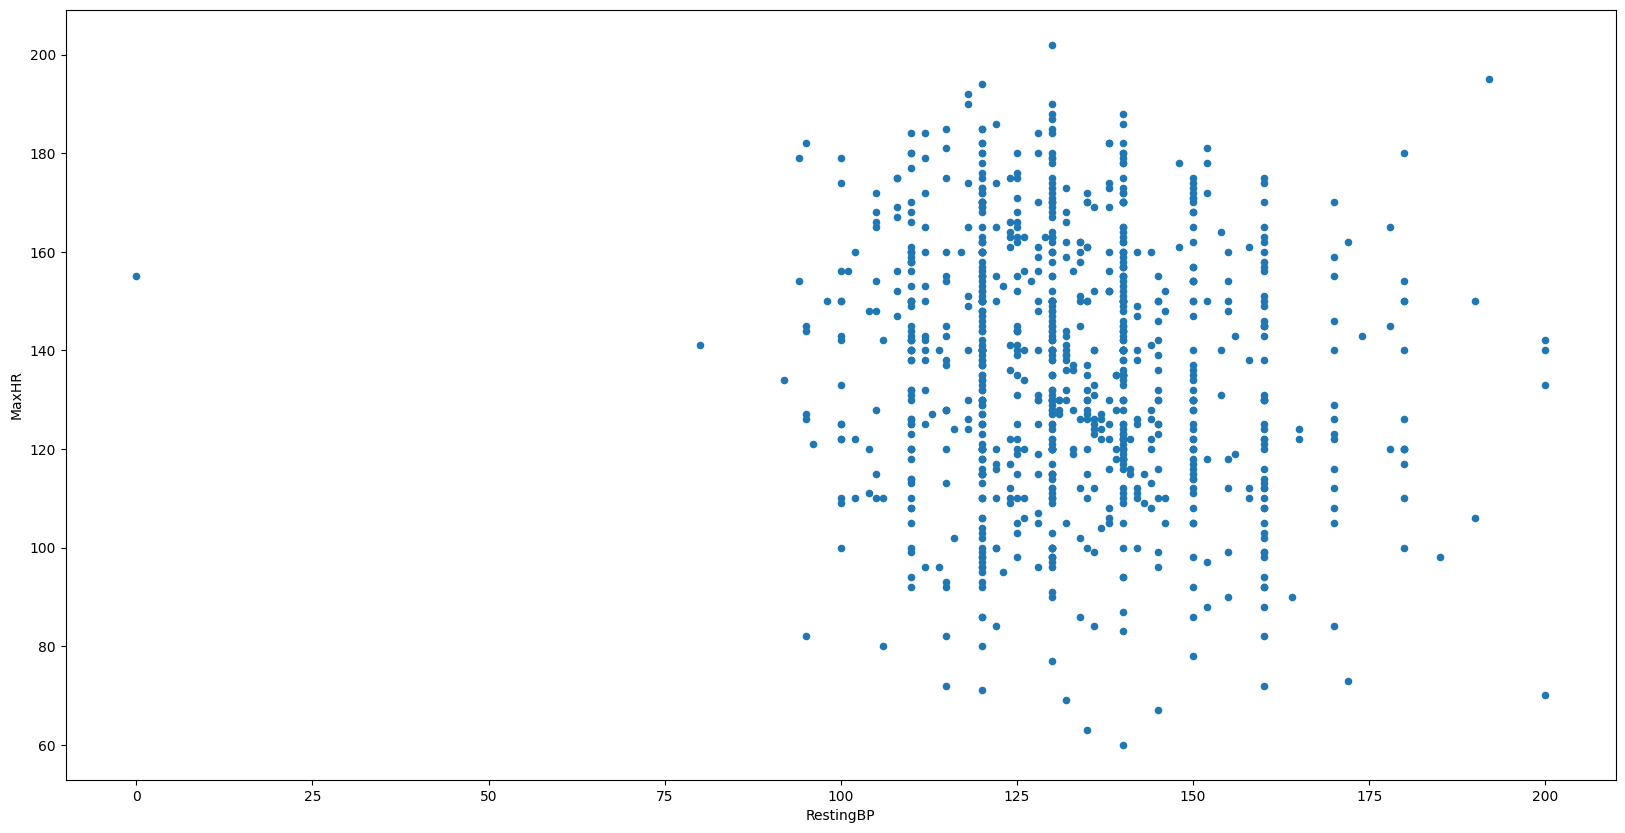

In [110]:
#Vērtību vizualizācijai tiek atlasīti tikai atribūti ar skaitliskām vērtībām nepārtrauktajā skalā
# darba_datu_kopa_vizualizacijai = datu_kopa[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]]
darba_datu_kopa_vizualizacijai = datu_kopa[["MaxHR", "RestingBP"]]
darba_datu_kopa_vizualizacijai.sort_values(by='RestingBP').plot(figsize=(20,10), y='MaxHR', x='RestingBP', kind='scatter')
#Vērtību attēlojuma izvade
# darba_datu_kopa_vizualizacijai.plot(figsize=(20,10), x='RestingBP', y='Age')
# darba_datu_kopa_vizualizacijai.plot(x='Age', y='Cholesterol', kind='line', color="purple")

Vērtību attēlojums ļauj veikt šādus secinājumus:
- kad kulmena dziļums ir lielāks par 0.4, tad kulmena garums, pleznas garums un ķermeņa masa samazinās (vērtības ir <0.4)
- kad kulmena dziļums ir ap 0.5, tad arī kulmena garums, pleznas garums un ķermeņa masa ir ap to pašu vērtību (viss saplūst kopā)
- kad kulmena dziļums ir mazāks par 0.4, tad kulmena garums, pleznas garums un ķermeņa masa pieaug (vērtības ir >0.4)
- vispārīgi kulmena garums, pleznas garums un ķermeņa masa mainās kopā un, iespējams, tieši šie atribūti ļaus vislabāk atdalīt klases tālākajā klasifikācijas uzdevumā

### Histogrammu analīze

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Sex_cat  \
0      172       

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>,
        <Axes: title={'center': 'Sex_cat'}>,
        <Axes: title={'center': 'ChestPainType_cat'}>],
       [<Axes: title={'center': 'RestingECG_cat'}>,
        <Axes: title={'center': 'ExerciseAngina_cat'}>,
        <Axes: title={'center': 'ST_Slope_cat'}>]], dtype=object)

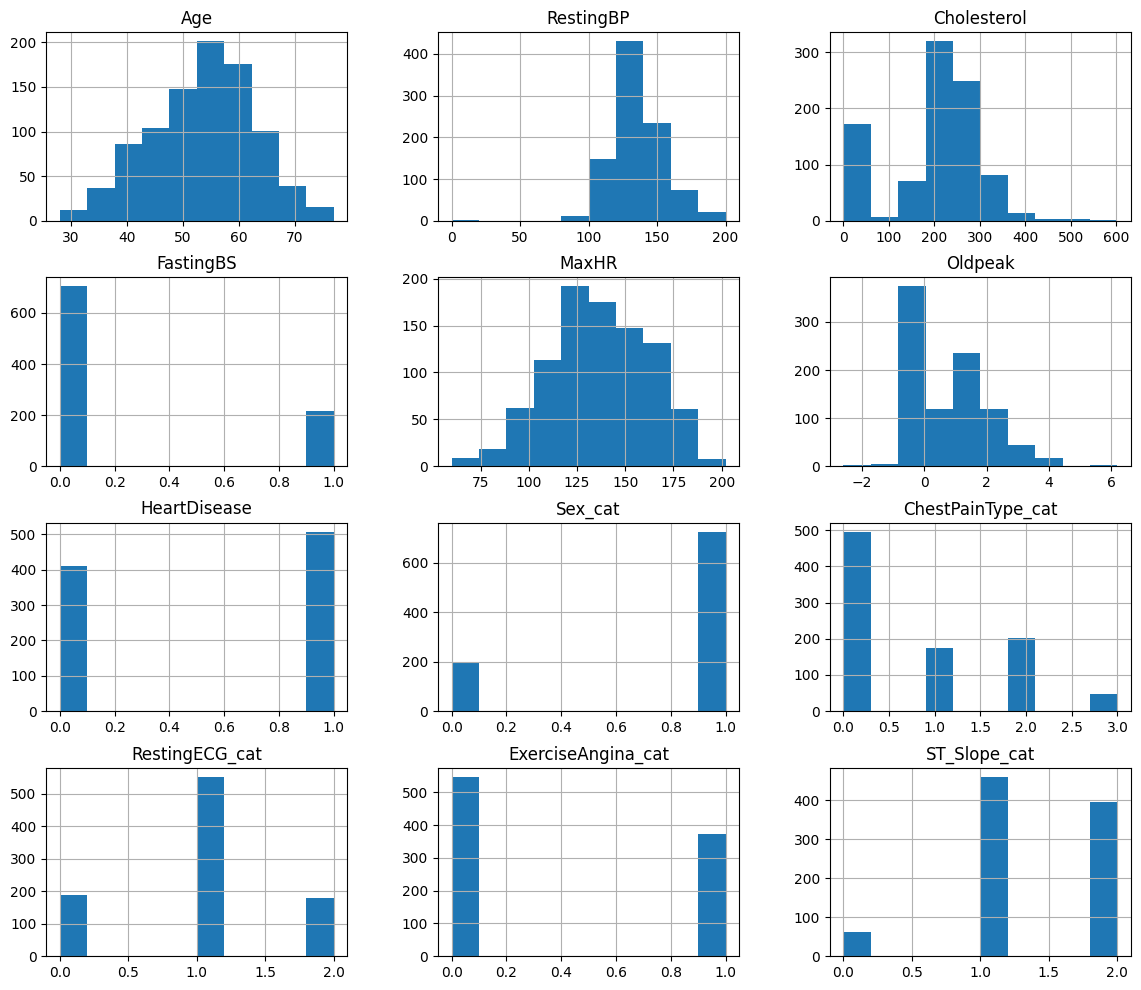

In [53]:
#Datu kopas atribūtu histogrammu izvade
print(datu_kopa)
datu_kopa.hist(figsize=(14,12))

Histogrammās redzam, ka viena no pingvīnu sugām ir mazāk pārstāvēta. Tas nozīmē, ka datu kopā pieejamās klases nav sabalansētas. Tas pats ir novērojams saistībā ar salām, no kurām pingvīni nāk: viena no tām ir mazāk pārstāvēta.
Pie tam datu kopā ir vairāk pingvīnu ar mazāku ķermeņa masu un vairāk pingvīnu ar garāko kulmenu un vairāk pingvīnu ar mazāko pleznas garumu.

### Izkliedes diagrammu analīze (Atribūtu savstarpējie sadalījumi)


Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

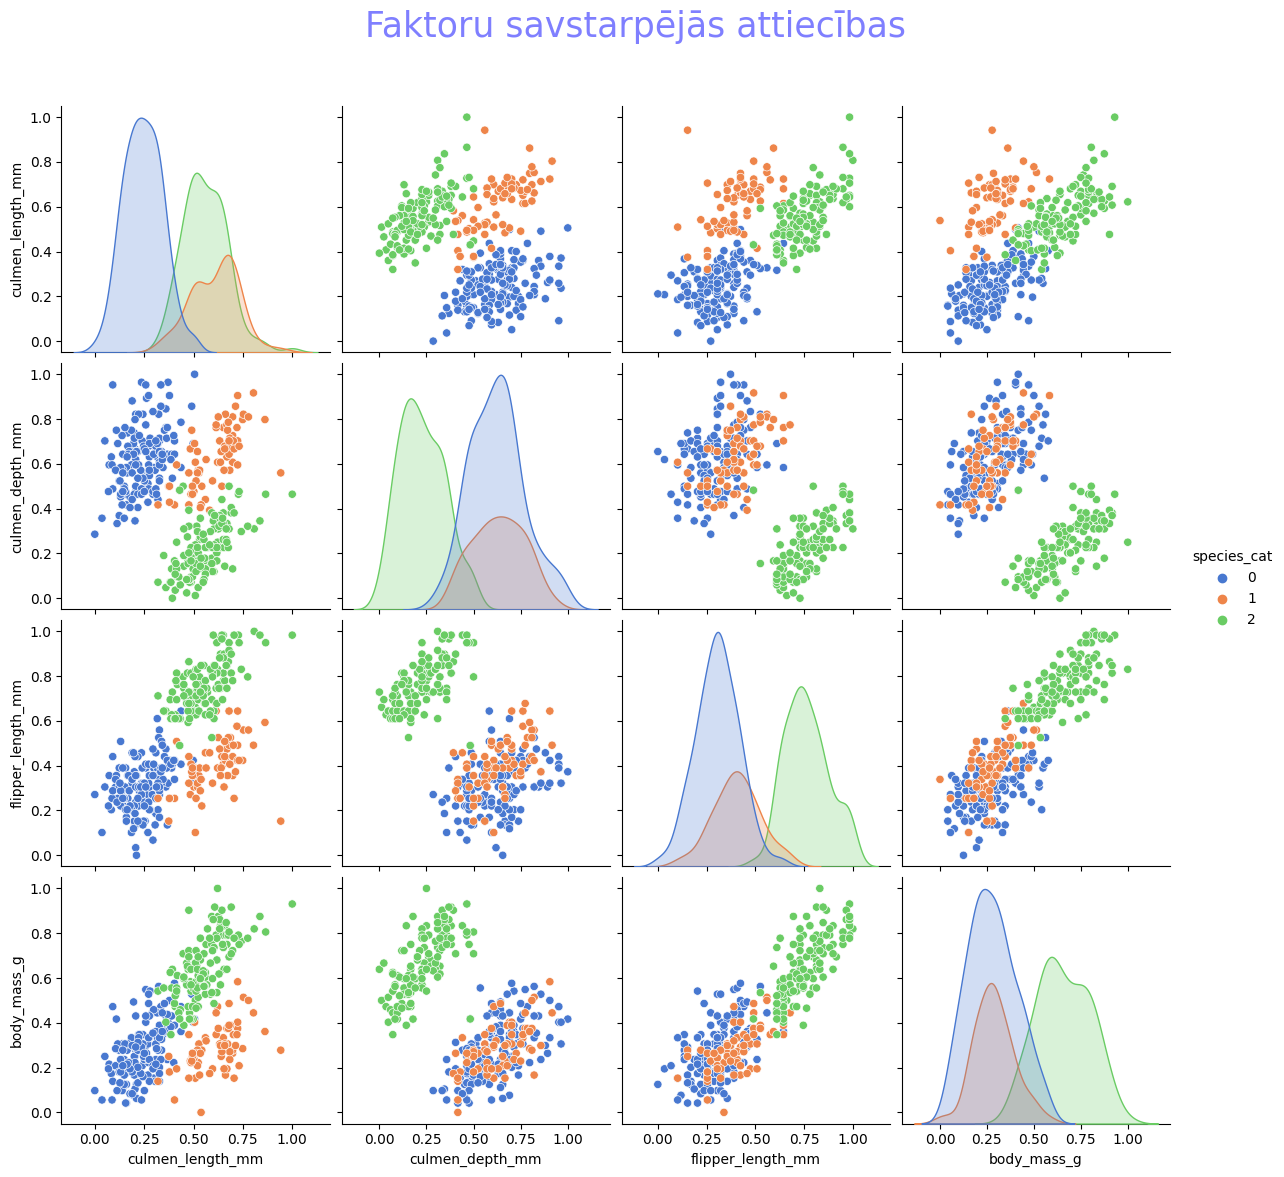

In [ ]:
#Izveidojam atribūtu pāru grafiku, norādot tā kopējo izmēru  un krāsu shēmu
paru_grafiks = sns.pairplot(darba_datu_kopa,hue='species_cat',palette="muted",height=3,vars=['culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g'],kind='scatter')
# Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
plt.subplots_adjust(top=0.9)
#Norādām virsrakstu grafikam
paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

Faktoru sadalījumi tiek pētīti, par pamatu izmantojot pingvīnu sugas. Grafiki ļauj secināt, ka šādi atribūtu pāri nodrošina pietiekami labu klašu atdalamību:
*	"culmen_length_mm" un "culmen_depth_mm" 
*	"culmen_length_mm" un "flipper_lenght_mm”
un tos var izmantot klasifikācijas uzdevumā.

Savukārt šādi atribūtu pāri nenodrošina labu klašu atdalamību:
*	"culmen_length_mm" un "body_mass_g": zilie datu objekti daļēji saplūst ar zaļajiem datu objektiem un labi atdalāmi ir tikai oranžie datu objekti
*	"culmen_depth_mm" un "flipper_length_mm": zilie datu objekti saplūst ar oranžajiem, tikai zaļie datu objekti ir labi atdalāmi
*	"culmen_depth_mm" un "body_mass_g": zilie datu objekti saplūst ar oranžajiem datu objektiem un tikai zaļie datu objekti ir labi atdalāmi
*	"flipper_length_mm" un "body_mass_g": zilie datu objekti saplūst ar oranžajiem datu objektiem un tikai zaļie datu objekti ir labi atdalāmi 

### Atribūtu savstarpējā korelācija

<Axes: >

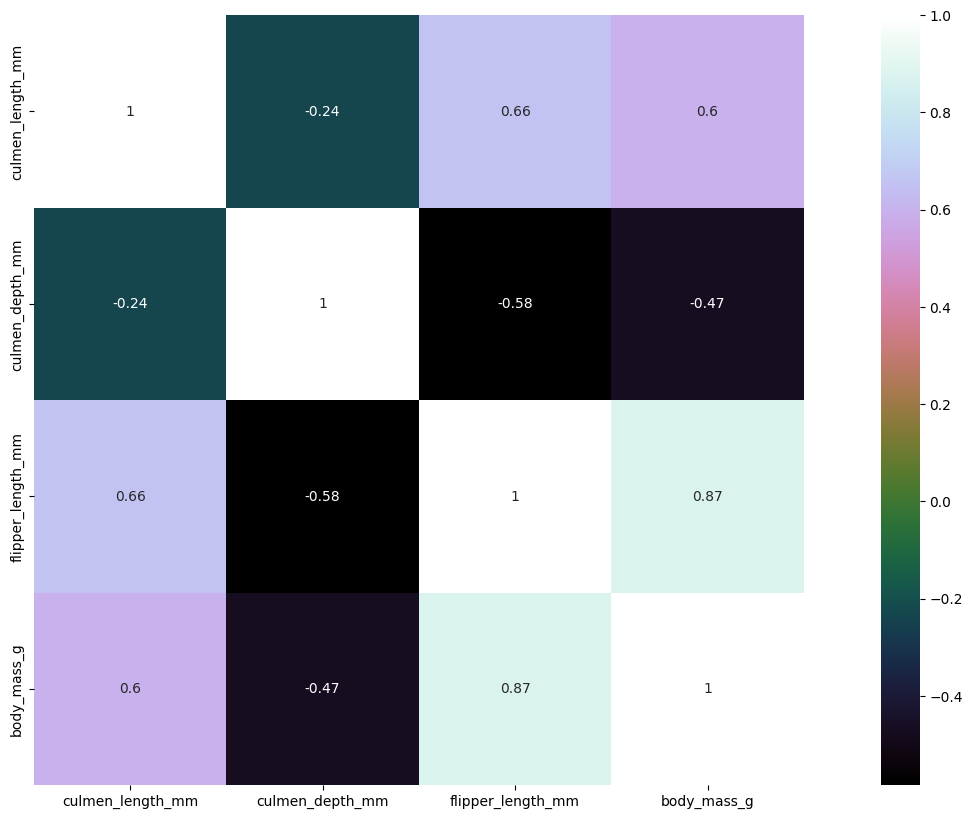

In [ ]:
#Tiek izveidota korelācijas matrica, tajā atspoguļojot korelācijas koeficientu skaitliskiem atribūtiem
korelacijas_matrica=darba_datu_kopa_vizualizacijai.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(korelacijas_matrica,vmax=1,square=True,annot=True,cmap='cubehelix')

Korelācijas matricas analīze ļauj secināt, ka:
* starp atribūtiem “culmen_length_mm” un “culmen_depth_mm” ir vāja negatīva korelācija
* atribūtam “culmen_length_mm” ir vidējā pozitīvā korelācija ar atribūtiem “flipper_length_mm” un “body_mass_g”
* atribūtam “culmen_depth_mm” ir vidējā negatīvā korelācija ar atribūtiem “flipper_length_mm” un “body_mass_g”
* starp atribūtiem “flipper_length_mm” un “body_mass_g” ir augsta pozitīva korelācija

Tādējādi saistībā ar pēdējiem diviem atribūtiem var paredzēt multikolinearitātes problēmu, kas var apgrūtināt atsevišķu mašīnmācīšanās rezultātu interpretāciju, līdz ar to tālākajā analīzē nebūtu vēlams abus šos atribūtus iekļaut.

K-vidējo algoritms
---


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


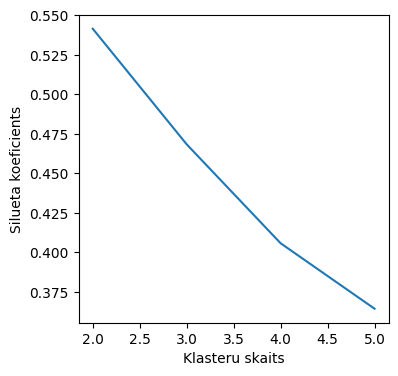

In [ ]:
#algoritma izmantošanai nepieciešamo bibliotēku ielāde
from sklearn.cluster import KMeans
from sklearn import metrics
#tiek atlasīta datu kopa klasterizācijas uzdevumam, ietverot tajā 3 atribūtus no normalizētas datu kopas
darba_datu_kopa_klasterizacijai_3_pazimes = darba_datu_kopa[['culmen_length_mm','culmen_depth_mm','flipper_length_mm']]
#Silueta koeficienta vērtību saraksta izveide
Silueta_koeficients = []
#tiek realizēts cikls ar 6 iterācijām (6 dažādām klasteru skaita vērtībām)
#šajā gadījumā 1 klasteris netiek apskatīts, jo tam nav jēgas silueta koeficienta aprēķinā
for i in range(2,6):
   #Kmeans klasterizācijas modeļa izveide, kur veidojamo klasteru skaits (n_clusters) ir vienāds ar cikla iterācijas numuru (2, 3..) 
   kmeans_modelis = KMeans(n_clusters = i, init = "k-means++")
   #Kmeans modeļa apmācība, izmantojot atlasīto datu kopu ar trim atribūtiem
   kmeans_modelis.fit(darba_datu_kopa_klasterizacijai_3_pazimes)
   #Silueta koeficients tiek aprēķināts, ņemot par pamatu iepriekš atlasīto datu kopu ar trim atribūtiem no normalizētas datu kopas
   Silueta_koeficients.append(metrics.silhouette_score(darba_datu_kopa_klasterizacijai_3_pazimes, kmeans_modelis.labels_))
#iegūto rezultātu vizuālā attēlošana
plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silueta_koeficients)
plt.xlabel('Klasteru skaits')
plt.ylabel('Silueta koeficients')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


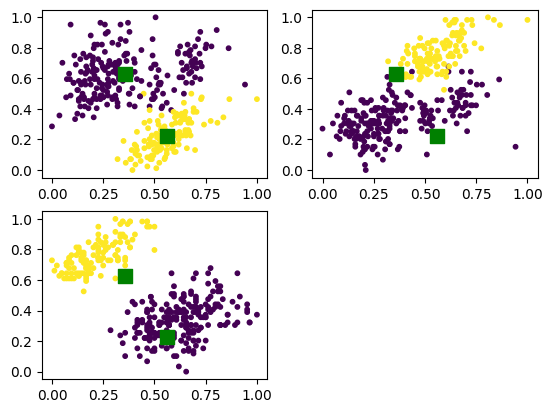

In [ ]:
#lai izvadītu kalsterizācijas rezultātus, tiek pievienota papildu bibliotēka
import matplotlib.pyplot as plt
#tiek izveidots un apmācīts K-vidējo algoritma nodelis ar 2 klasteriem, izmantojot iepriekš izveidoto datu apakškopu ar 3 atribūtiem
kmeans_modelis = KMeans(n_clusters=2, init = "k-means++").fit(darba_datu_kopa_klasterizacijai_3_pazimes)
#tiek iegūti klasteru centri
centroids = kmeans_modelis.cluster_centers_
#izveidojam prognozes datu objektu piederībai klasteriem
ypred = kmeans_modelis.predict(darba_datu_kopa_klasterizacijai_3_pazimes)
#atspoguļojam klasterizācijas rezultātus izkliedes diagrammās
plt.subplot(2,2,1)                            # Izveido attēlu matricā (2 x 2), indekss sākas ar 1 kreisajā augšējā stūrī 
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['culmen_length_mm'], darba_datu_kopa_klasterizacijai_3_pazimes['culmen_depth_mm'], s = 10, c = ypred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,2)                            # Izveido nākošo attēlu matricā ar indeksu 2
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['culmen_length_mm'], darba_datu_kopa_klasterizacijai_3_pazimes['flipper_length_mm'], s = 10, c = ypred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,3)                            # Izveido nākošo attēlu matricā ar indeksu 2
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['culmen_depth_mm'], darba_datu_kopa_klasterizacijai_3_pazimes['flipper_length_mm'], s = 10, c = ypred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.show()

Hierarhiskā aglomeratīvā klasterēšana
---

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.cluster import AgglomerativeClustering
#algoritma modeļa izveide, par pamatu izmantojot datu apakškopu ar 3 atribūtiem
clustering = AgglomerativeClustering().fit(darba_datu_kopa_klasterizacijai_3_pazimes)

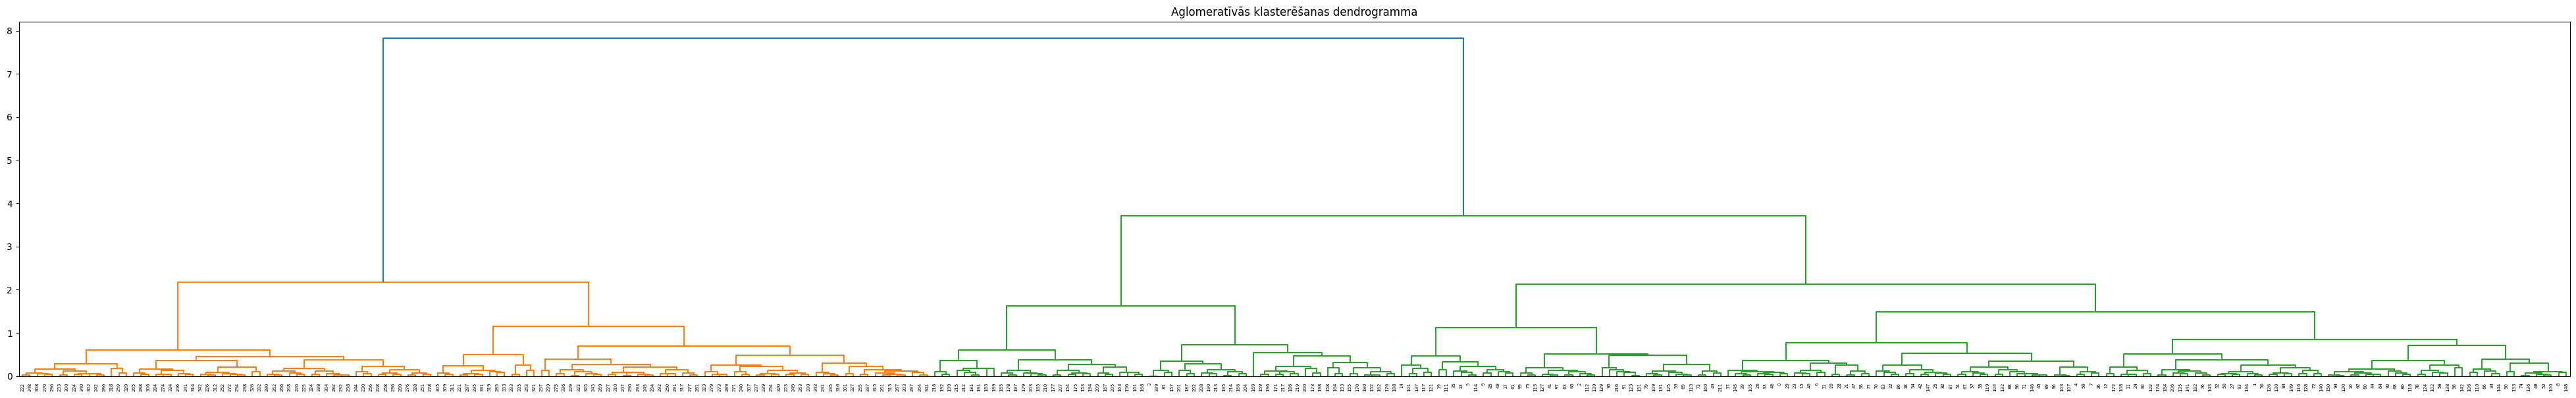

In [ ]:
#dendrogrammas atspoguļošanai nepieciešamās bibliotēkas ielāde
import scipy.cluster.hierarchy as shc
#dendrogrammas izvade, par pamatu izmantojot saistīšanas metodi "ward"
plt.figure(figsize =(50, 7))
plt.title('Aglomeratīvās klasterēšanas dendrogramma')
Dendrogram = shc.dendrogram((shc.linkage(darba_datu_kopa_klasterizacijai_3_pazimes, method ='ward')))

Mākslīgo neironu tīkli
---

In [ ]:
#bibliotēkas ielāde datu sadalīšanai apmācības un testa datu kopās
from sklearn.model_selection import train_test_split
#atsevišķajā mainīgajā saglabājam datu objektu izeju vērtības, t.i. "pingvīnu sugas"
izejas = darba_datu_kopa['species_cat']
#uzdodam datu objektu proporciju, kuri veidos apmācības datu kopu (70%)
apmacibas_datu_proporcija = 0.7
#tiek veikta datu kopas sadalīšana testa un apmācības kopā, izmantojot nejaušu sadalījumu ar attecību 70:30
X_apmacibas, X_testa, y_apmacibas, y_testa = train_test_split(darba_datu_kopa_klasterizacijai_3_pazimes, izejas, test_size=1.0 - apmacibas_datu_proporcija, random_state=42)

####**1.modelis** - 2 slāņi ar 100 neironiem katrā

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.neural_network import MLPClassifier
#izveidojam mākslīgo neironu tīkla modeli ar 2 slāņiem, katrā no kuriem ir 100 neironi
#Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 1000, aktivizācijas funkcija ir loģistiskā, 
#svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.1 un apmācības iterāciju izvade
neironu_tikla_modelis = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1)
#izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas
neironu_tikla_modelis.fit(X_apmacibas, y_apmacibas)

Iteration 1, loss = 1.06319330
Iteration 2, loss = 1.21708788
Iteration 3, loss = 1.06020003
Iteration 4, loss = 1.09431738
Iteration 5, loss = 1.05500984
Iteration 6, loss = 1.09195059
Iteration 7, loss = 1.12772576
Iteration 8, loss = 1.06096475
Iteration 9, loss = 1.05947884
Iteration 10, loss = 1.08158731
Iteration 11, loss = 1.05400761
Iteration 12, loss = 1.17765433
Iteration 13, loss = 1.08269839
Iteration 14, loss = 1.10510265
Iteration 15, loss = 1.07440377
Iteration 16, loss = 1.05947451
Iteration 17, loss = 1.06029018
Iteration 18, loss = 1.07317258
Iteration 19, loss = 1.19823788
Iteration 20, loss = 1.11407846
Iteration 21, loss = 1.11665739
Iteration 22, loss = 1.22160513
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        50
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        34

    accuracy                           0.48       104
   macro avg       0.16      0.33      0.22       104
weighted avg       0.23      0.48      0.31       104



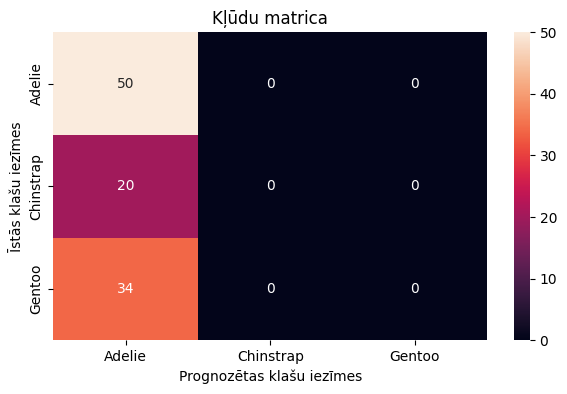

In [ ]:
#bibliotēku pievienošana algoritma veikuma novērtēšanai un izvadei
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
#izmantojam apmācīto modeli ar testa kopu, lai iegūtu prognozes
y_prognoze = neironu_tikla_modelis.predict(X_testa)
#izvadām modeļa veikuma novērtējuma metrikas
print(classification_report(y_testa,y_prognoze, zero_division=0))
#veidojam kļūdu matricu
kludu_matrica = confusion_matrix(y_testa, y_prognoze)
#izvadām kļūdu matricu
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['species'].unique());
ax.yaxis.set_ticklabels(datu_kopa['species'].unique());

Kļūdu matricā var redzēt, ka 54 datu objekti tika klasificēti nepareizi, līdz ar to kopējā tīkla precizitāte ir diezgan maza - 48%.

####**2.modelis** -viens slānis ar 5 neironiem 

In [ ]:
#izveidojam mākslīgo neironu tīkla modeli ar 5 neironiem vienā slēptajā slānī
#Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 50, aktivizācijas funkcija ir loģistiskā, 
#svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.2 un bez apmācības iterāciju izvades
neironu_tikla_modelis_1_slanis = MLPClassifier(hidden_layer_sizes=(5), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
#izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas
neironu_tikla_modelis_1_slanis.fit(X_apmacibas, y_apmacibas)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        50
           1       0.93      0.70      0.80        20
           2       0.97      1.00      0.99        34

    accuracy                           0.93       104
   macro avg       0.94      0.89      0.91       104
weighted avg       0.93      0.93      0.93       104



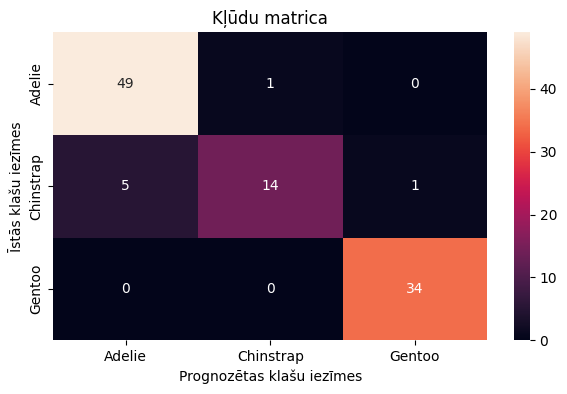

In [ ]:
y_prognoze_1_slanis = neironu_tikla_modelis_1_slanis.predict(X_testa)
print(classification_report(y_testa,y_prognoze_1_slanis, zero_division=0))
kludu_matrica = confusion_matrix(y_testa, y_prognoze_1_slanis)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['species'].unique());
ax.yaxis.set_ticklabels(datu_kopa['species'].unique());

Kļūdu matricā var redzēt, ka tikai 4 datu objekti tika klasificēti nepareizi, līdz ar to kopējā tīkla precizitāte ir diezgan augsta - 96%.
Tādējādi šis modelis ir labāks par iepriekšējo

kNN algoritms
---

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.neighbors import KNeighborsClassifier
#Tiek izveidots algoritma modelis ar 5 kaimiņiem
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
#Padodam izveidotajam modelim apmācības datu kopu
KNN_MODEL.fit(X_apmacibas, y_apmacibas)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.90      0.95      0.93        20
           2       1.00      1.00      1.00        34

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



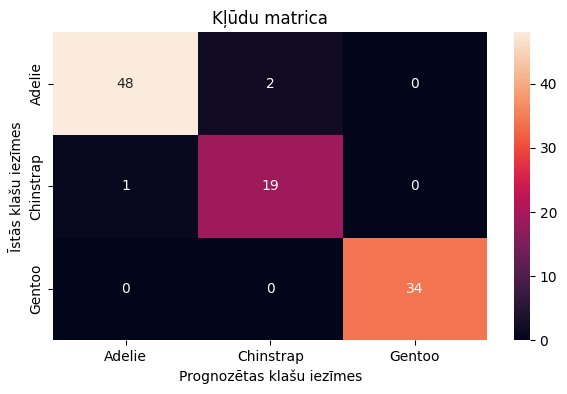

In [ ]:
#Nosakam klases iezīmes testa datu kopas datu objektiem
y_prognoze_knn = KNN_MODEL.predict(X_testa)
#izvadām modeļa veikuma novērtējuma metrikas
print(classification_report(y_testa,y_prognoze_knn, zero_division=0))
#veidojam kļūdu matricu
kludu_matrica = confusion_matrix(y_testa, y_prognoze_knn)
#izvadām kļūdu matricu
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['species'].unique());
ax.yaxis.set_ticklabels(datu_kopa['species'].unique());

Kļūdu matricā var redzēt, ka tikai 3 datu objekti tika klasificēti nepareizi, līdz ar to kopējā algoritma precizitāte ir diezgan augsta - 97%.Tā ir pat nedaudz augstākā nekā neironu tīkla modelim